In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import seaborn

In [4]:
data = pd.read_csv('uber-raw-data-apr14.csv')

data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [5]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [6]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [7]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


(array([52721., 59680., 52581., 58631., 45427., 56764., 38781., 60673.,
        64697., 74561.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

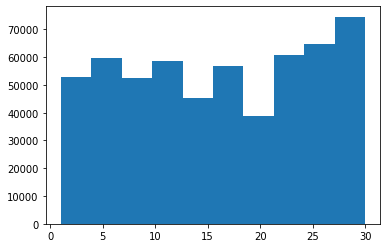

In [8]:
hist(data.dom)

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 1.        ,  1.96666667,  2.93333333,  3.9       ,  4.86666667,
         5.83333333,  6.8       ,  7.76666667,  8.73333333,  9.7       ,
        10.66666667, 11.63333333, 12.6       , 13.56666667, 14.53333333,
        15.5       , 16.46666667, 17.43333333, 18.4       , 19.36666667,
        20.33333333, 21.3       , 22.26666667, 23.23333333, 24.2       ,
        25.16666667, 26.13333333, 27.1       , 28.06666667, 29.03333333,
        30.        ]),
 <a list of 30 Patch objects>)

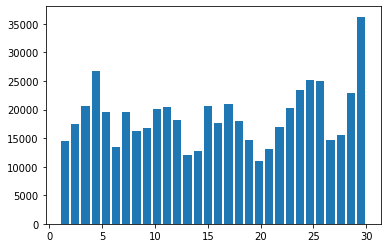

In [9]:
hist(data.dom, bins=30, rwidth=.8)

Text(0.5, 1.0, 'Frequency by DoM - Uber - Apr 2014')

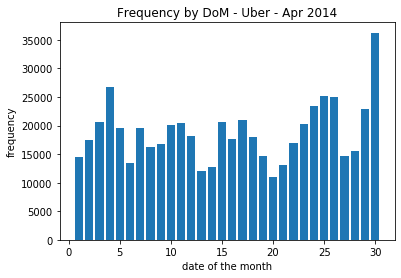

In [10]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - Uber - Apr 2014')

In [11]:
for k, rows in data.groupby('dom'):
    print(k, rows)
    break
    # print(k, len(rows))

1                  Date/Time      Lat      Lon    Base  dom
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1
...                    ...      ...      ...     ...  ...
554926 2014-04-01 23:21:00  40.7219 -73.9920  B02764    1
554927 2014-04-01 23:25:00  40.7261 -74.0027  B02764    1
554928 2014-04-01 23:38:00  40.7364 -73.9926  B02764    1
554929 2014-04-01 23:41:00  40.7149 -73.9405  B02764    1
554930 2014-04-01 23:46:00  40.7493 -73.9768  B02764    1

[14546 rows x 5 columns]


In [12]:
for k, rows in data.groupby('dom'):
    print(k, len(rows))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [13]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)

In [14]:
data.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


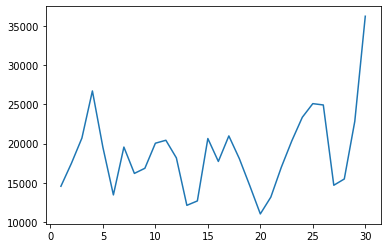

In [15]:
plot(by_date)

<BarContainer object of 30 artists>

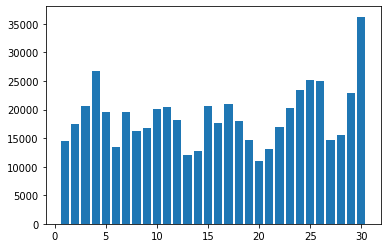

In [16]:
bar(range(1,31),by_date)

In [17]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

Text(0.5, 1.0, 'Frequency by DoM - Uber - Apr 2016')

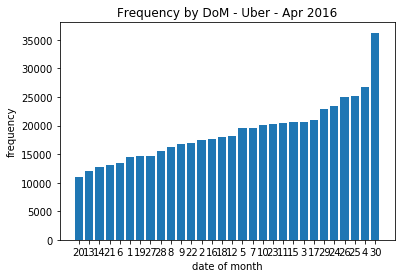

In [51]:
bar(range(1,31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('date of month')
ylabel('frequency')
title('Frequency by DoM - Uber - Apr 2016')


In [40]:
def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

(array([11910.,  7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924.,
        22843., 17939., 17865., 18774., 19425., 22603., 27190., 35324.,
        42003., 45475., 43003., 38923., 36244., 36964., 30645., 20649.]),
 array([-1.        ,  0.04166667,  1.08333333,  2.125     ,  3.16666667,
         4.20833333,  5.25      ,  6.29166667,  7.33333333,  8.375     ,
         9.41666667, 10.45833333, 11.5       , 12.54166667, 13.58333333,
        14.625     , 15.66666667, 16.70833333, 17.75      , 18.79166667,
        19.83333333, 20.875     , 21.91666667, 22.95833333, 24.        ]),
 <a list of 24 Patch objects>)

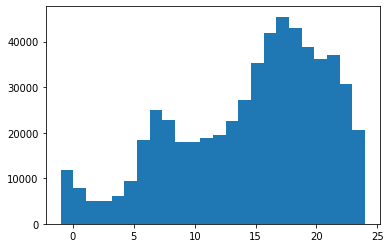

In [53]:
hist(data.hour, bins=24, range=[-1,24])

In [63]:
def get_wd(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_wd)

In [65]:
data['weekday']

0         1
1         1
2         1
3         1
4         1
         ..
564511    2
564512    2
564513    2
564514    2
564515    2
Name: weekday, Length: 564516, dtype: int64

''

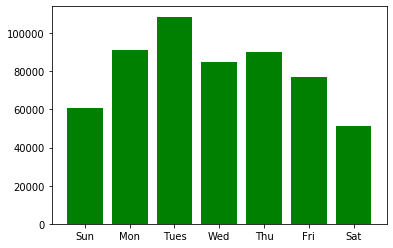

In [75]:
hist(data.weekday, bins=7, range=[-.5, 6.5], rwidth=.8,color='green')
xticks(range(7), "Sun Mon Tues Wed Thu Fri Sat".split())
,

In [82]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

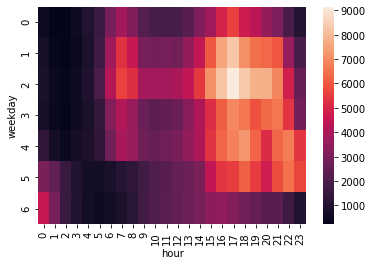

In [83]:
seaborn.heatmap(by_cross)

''

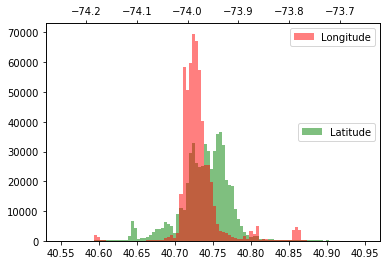

In [104]:
hist(data['Lat'], bins=100, range=[40.55, 40.95], color='g', alpha=.5, label='Latitude')
legend(loc='center right')
twiny()
hist(data['Lon'], bins=100, range=[-74.25,-73.65], color='r', alpha=.5, label='Longitude')
legend(loc='upper right')
,

(1, 100)

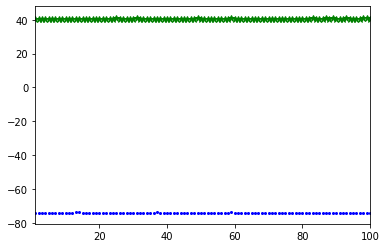

In [115]:
plot(data['Lat'], '*', ms='7', color='green')
plot(data['Lon'], '.', ms='4', color='blue')
xlim(1,100)

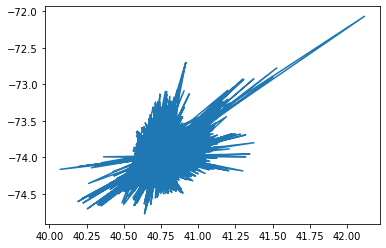

In [116]:
plot(data['Lat'], data['Lon'])

(40.7, 40.9)

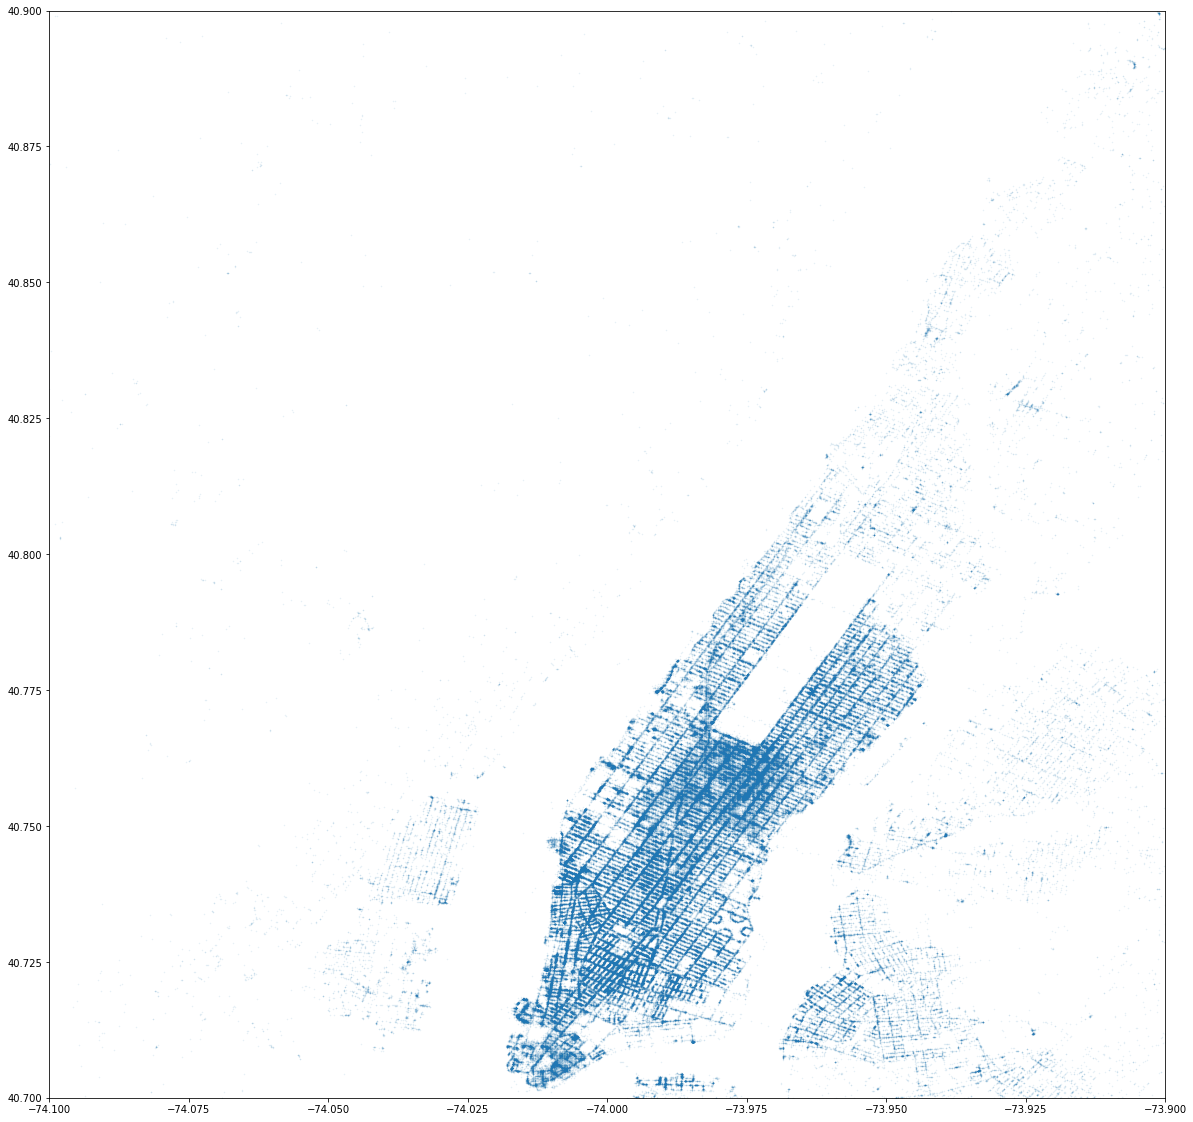

In [126]:
figure(figsize=(20,20))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.1)
xlim(-74.1, -73.9)
ylim(40.7, 40.9)

(-74.2, -73.7)

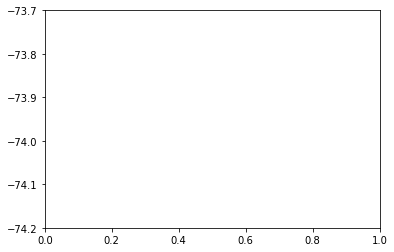